Laboratorio 2 - Salinas Montaño Carlos (Regresion Logisitca)

In [1]:
#Se utiliza para el manejo de rutas y directorios
import os
#Calculo cientifico y vectorial para python
import numpy as np
#librerias para graficar
from matplotlib import pyplot
#Modulo de optimizacion de Scipy
from scipy import optimize
#le dice a matplotlib que incruste los graficos en el cuaderno
#%matplotlib inline
import shutil
# Para realizar la lectura de los datos y analisis de los datos importamos la libreria "pandas", ya que tiene gran flexibilidad y capacidad en manipulación de datos y
# su integración con otras bibliotecas.
import pandas as pd
# LabelEncoder es una herramienta para normalizar etiquetas categóricas, es decir, convierte etiquetas de texto en números enteros.
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [2]:
# Acceder a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Carga de DataSet
data= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/smoke_detection_iot.csv")

In [4]:
print(data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0               0  1654733331          20.000        57.36          0   
1               1  1654733332          20.015        56.67          0   
2               2  1654733333          20.029        55.96          0   
3               3  1654733334          20.044        55.28          0   
4               4  1654733335          20.059        54.69          0   
...           ...         ...             ...          ...        ...   
62625       62625  1655130047          18.438        15.79        625   
62626       62626  1655130048          18.653        15.87        612   
62627       62627  1655130049          18.867        15.84        627   
62628       62628  1655130050          19.083        16.04        638   
62629       62629  1655130051          19.299        16.52        643   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   12306        18520        9

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Como podemos observar todos los datos son de tipo numerico asi que no tenemos que convertir ninguno de los datos. Ademas que tampoco se tiene que hacer ningun llenado de datos ya que todas las columnas se encuentran completas al 100%

In [6]:
# Division de dataset en entrenamiento y prueba, le damos a TEST (prueba) el 20% (0.2) y lo restante, osea el 80% para entrenamiento
# Para esto utilizamos la libreria "train_test_split"
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [7]:
print(train_data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
28479       28479  1654764828          21.430        59.72        283   
42605       42605  1654778954          25.980        47.24       1247   
17963       17963  1654751294          18.116        47.55       1124   
56394       56394  1654717439          59.620        11.60      60000   
29875       29875  1654766224          22.250        48.83         24   
...           ...         ...             ...          ...        ...   
62570       62570  1655129992           7.664        15.67        781   
38158       38158  1654774507          27.080        47.10       1124   
860           860  1654734191          26.945        57.50          0   
15795       15795  1654749126          11.997        47.93       1128   
56422       56422  1654717467          57.270        12.32      53355   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]    PM1.0    PM2.5  \
28479        400   13138        19923        939.

In [8]:
print(test_data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
31120       31120  1654767469          21.330        51.93        138   
49054       49054  1654785403          24.300        53.78       1297   
55910       55910  1654716955          43.330        18.53          0   
33802       33802  1654770151          18.440        56.79        358   
9683         9683  1654743014          -4.350        57.35        825   
...           ...         ...             ...          ...        ...   
2084         2084  1654735415          21.805        47.50          0   
24481       24481  1654757812          -1.740        54.32       1253   
41631       41631  1654777980          26.940        47.87       1222   
54885       54885  1654715930          25.850        44.96          0   
9273         9273  1654742604          -5.169        60.25        586   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
31120        400   13190        20128        9

In [9]:
#Creamos un nuevo dataset con el nombre de train.csv, el cual contiene el 80% de los datos
train_data.to_csv("train.csv", index=False)

In [10]:
#Creamos un nuevo dataset con el nombre de test.csv, el cual contiene el 20% de los datos
test_data.to_csv("test.csv", index=False)

In [11]:
#Carga de dataset
data = pd.read_csv('/content/train.csv')

In [12]:
X = data.iloc[:, 0:15]
y = data.iloc[:,15]
m = y.size

In [13]:
print(X)
print('*'*50)
print(y)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0           28479  1654764828          21.430        59.72        283   
1           42605  1654778954          25.980        47.24       1247   
2           17963  1654751294          18.116        47.55       1124   
3           56394  1654717439          59.620        11.60      60000   
4           29875  1654766224          22.250        48.83         24   
...           ...         ...             ...          ...        ...   
50099       62570  1655129992           7.664        15.67        781   
50100       38158  1654774507          27.080        47.10       1124   
50101         860  1654734191          26.945        57.50          0   
50102       15795  1654749126          11.997        47.93       1128   
50103       56422  1654717467          57.270        12.32      53355   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]    PM1.0    PM2.5  \
0            400   13138        19923        939.

In [14]:
#Normalizamos los datos para no tener los datos tan dispersos y que la facilidad de calculo sea mejor
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [15]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0           28479  1654764828          21.430        59.72        283   
1           42605  1654778954          25.980        47.24       1247   
2           17963  1654751294          18.116        47.55       1124   
3           56394  1654717439          59.620        11.60      60000   
4           29875  1654766224          22.250        48.83         24   
...           ...         ...             ...          ...        ...   
50099       62570  1655129992           7.664        15.67        781   
50100       38158  1654774507          27.080        47.10       1124   
50101         860  1654734191          26.945        57.50          0   
50102       15795  1654749126          11.997        47.93       1128   
50103       56422  1654717467          57.270        12.32      53355   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]    PM1.0    PM2.5  \
0            400   13138        19923        939.

In [16]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

In [17]:
#Va en un rango de 0 a 1, justo lo que necesitamos, aunque nunca llega exactamente a 0 o 1
def sigmoid(z):
     #Calcula la sigmoide de una entrada z
     #convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [18]:
#prueba de la implementacion de la Sigmoide
z = 0
g = sigmoid(z)
print ('g(', z,') = ', g)

g( 0 ) =  0.5


In [19]:
#Configuramos la matriz adecuadamente, y agregar una columnas de unos que corresponde al termino de intersepcion
m, n = X.shape
#Agrega el termino de Intercepcion a A
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X[5])

[ 1.          0.48080378 -0.14124135  0.59471619  0.55857059 -0.10701083
 -0.11790844 -0.29371771 -0.50516741  0.14098563 -0.10589683 -0.09096589
 -0.11141592 -0.0896204  -0.07257014  0.58049633]


In [20]:
print(X)

[[ 1.         -0.15294747 -0.2456713  ... -0.08988852 -0.07258309
  -0.92612704]
 [ 1.          0.62878237 -0.11685734 ... -0.08971782 -0.07257476
   0.93228737]
 [ 1.         -0.73490068 -0.36908686 ... -0.08979794 -0.07257846
   0.97859643]
 ...
 [ 1.         -1.68137707 -0.52504786 ... -0.09037924 -0.0726053
  -1.27147164]
 [ 1.         -0.85487734 -0.38885669 ... -0.08958672 -0.07256921
   0.69337468]
 [ 1.          1.39341222 -0.67755279 ... -0.0217335  -0.05662062
  -0.68997711]]


In [21]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [22]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [23]:
#Carga de dataset
data = pd.read_csv('/content/test.csv')
print(data)

       Unnamed: 0         UTC  Temperature[C]  Humidity[%]  TVOC[ppb]  \
0           31120  1654767469          21.330        51.93        138   
1           49054  1654785403          24.300        53.78       1297   
2           55910  1654716955          43.330        18.53          0   
3           33802  1654770151          18.440        56.79        358   
4            9683  1654743014          -4.350        57.35        825   
...           ...         ...             ...          ...        ...   
12521        2084  1654735415          21.805        47.50          0   
12522       24481  1654757812          -1.740        54.32       1253   
12523       41631  1654777980          26.940        47.87       1222   
12524       54885  1654715930          25.850        44.96          0   
12525        9273  1654742604          -5.169        60.25        586   

       eCO2[ppm]  Raw H2  Raw Ethanol  Pressure[hPa]  PM1.0  PM2.5  NC0.5  \
0            400   13190        20128        9

In [24]:
fila_deseada = 1

if fila_deseada < len(data):
  fila_completa = test_data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[4.9054000e+04 1.6547854e+09 2.4300000e+01 5.3780000e+01 1.2970000e+03
 4.0000000e+02 1.3015000e+04 1.9403000e+04 9.3877400e+02 2.0300000e+00
 2.1100000e+00 1.3990000e+01 2.1810000e+00 4.9000000e-02 2.4060000e+04
 1.0000000e+00]


theta calculado por el descenso por el gradiente: [ 2.04259066 -0.40602052 -0.55973736 -0.54783584  0.50591507 -0.8186757
  0.37471656  0.56310092 -0.86573322 -0.85147884 -0.05381637 -0.01088786
 -0.0983599  -0.00784993  0.02531147  2.36070965]
el numero de veces embarazada: 49054.0 y Concentración de glucosa plasmática a las 2 horas en una prueba.: 1654785400.0 (usando el descenso por el gradiente):0.0


<ipython-input-17-a58772a2f008>:9: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


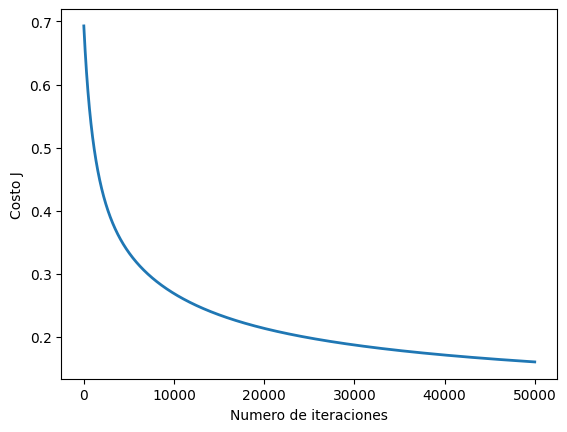

In [25]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 50000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(16)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 4.9054000e+04, 1.6547854e+09, 2.4300000e+01, 5.3780000e+01, 1.2970000e+03, 4.0000000e+02, 1.3015000e+04, 1.9403000e+04, 9.3877400e+02, 2.0300000e+00, 2.1100000e+00, 1.3990000e+01, 2.1810000e+00, 4.9000000e-02, 2.4060000e+04]
aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"el numero de veces embarazada: {X_array[1]} y Concentración de glucosa plasmática a las 2 horas en una prueba.: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")

In [26]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento
    epsilon = 1e-8
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion costFunction utilizando dos casos de prueba para  θ

In [27]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.21501277  0.16250152  0.17526892  0.07450492 -0.18075954  0.09655871
  0.04277261 -0.04778139  0.15463413 -0.11283394  0.04886144  0.03676132
  0.05755764  0.03579373  0.02431628 -0.30432667]
Gradiente en theta inicial (zeros):
	[-0.2150, 0.1625, 0.1753]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [28]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

<ipython-input-28-0dfcfa2e2ef1>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,
<ipython-input-17-a58772a2f008>:9: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
<ipython-input-26-0729f69019bc>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h+epsilon)))


Costo con un valor de theta encontrado por optimize.minimize: 0.032
Costo esperado (aproximado): 0.203

theta:
	[26.041, -2.086, -0.028]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


In [29]:
# verificar si ingresa o no a la universidad
X_array = [1, 90, 70]
theta_om = [-25.161, 0.206, 0.201]
aprueba = sigmoid(np.dot(X_array, theta_om))   # Se debe cambiar esto

print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")

Un estudiante con nota del examen 1: 90 y nota del examen 2: 70 (usando el descenso por el gradiente):0.9994183152095036


In [30]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Grafica los puntos X y Y en una nueva figura con un limite de desicion definido por theta.
    the data points X and y into a new figure with the decision boundary defined by theta.
    Grafica los puntos con * para los ejemplos positivos y con o para los ejemplos negativos.

    Parametros:
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parametros para la regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Data set de entrada. Se supone que X es una de las siguientes:
            1) Matriz Mx3, donde la primera columna es una columna de unos para intercepción.
            2) Matriz MxN, N> 3, donde la primera columna son todos unos.

    y : array_like
        Vector de datos de etiquetas de la forma (m, ).
    """
    # hacer que theta sera un arreglo numpy
    theta = np.array(theta)

    # Graficar los datos (recordar que la primera columna en X es la intercepción)
    plotData(X[:, 1:8], y) #cambiar estos valores depende a las x que tengas

    if X.shape[1] <= 8: #cambiar estos valores depende a las x que tengas
        # Solo se requieren 2 puntos para definir una linea, para lo cual se eligen dos puntos finales
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calcular la línea límite de decisión
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        print(plot_x)
        print(plot_y)
        # Graficar y ajustar los ejes para una mejor visualización
        pyplot.plot(plot_x, plot_y)

        # Leyenda, especifica para el ejercicio
        pyplot.legend(['Admitido', 'No admitido', 'Limite de decisión'])
        pyplot.xlim([30, 100])
        pyplot.ylim([30, 100])
    else:
        # Rango de la grilla
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evalua z = theta*x sobre la grilla
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # importante transponer z antes de llamar al contorno
        # print(z)

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [31]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

In [32]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
prob = sigmoid(np.dot([1, 4.9054000e+04, 1.6547854e+09, 2.4300000e+01, 5.3780000e+01, 1.2970000e+03, 4.0000000e+02, 1.3015000e+04, 1.9403000e+04, 9.3877400e+02, 2.0300000e+00, 2.1100000e+00, 1.3990000e+01, 2.1810000e+00, 4.9000000e-02, 2.4060000e+04], theta))
print('Con estos datos, se predice una probabilidad de que haya un incendio de: {:.3f}%'.format(prob))
print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y) * 100))
print('Precisión esperada (aproximadamente): 89.00 %')

Con estos datos, se predice una probabilidad de que haya un incendio de: 0.000%
Valor esperado: 0.775 +/- 0.002

Precisión de entrenamiento: 99.16 %
Precisión esperada (aproximadamente): 89.00 %


<ipython-input-17-a58772a2f008>:9: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))
